### Random Forests Example 0.1

We examine again the **heart** data set. We split the data set in two equally sized parts and grow a decision tree on both halves. 


Matplotlib is building the font cache; this may take a moment.


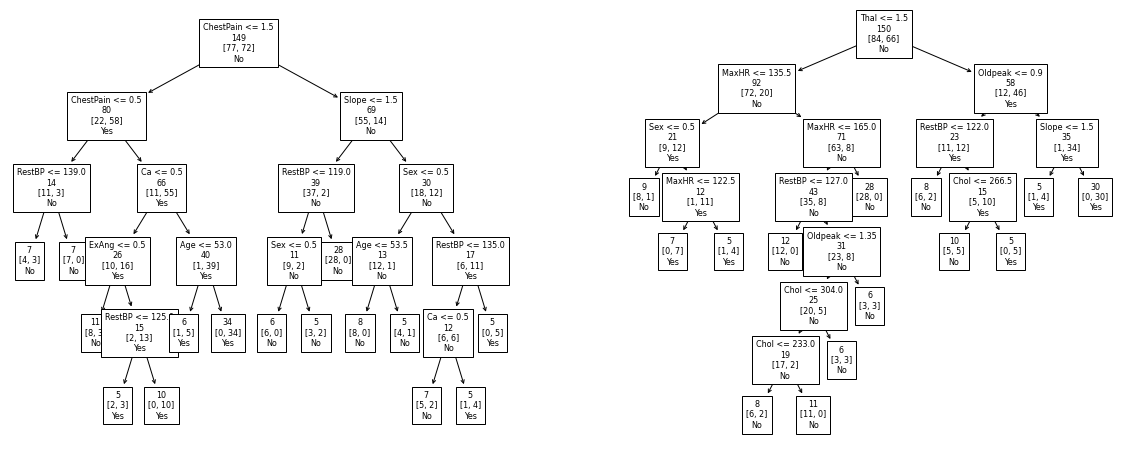

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree

# Load data
df = pd.read_csv('./data/Heart.csv')

# Replace Categorical Variable with dummies
df = pd.get_dummies(data=df, columns=['AHD'], drop_first=True)
df['ChestPain'], ChestPain_codes = pd.factorize(df['ChestPain'])
df['Thal'], Thal_codes = pd.factorize(df['Thal'])
# Drop NA rows:
df.dropna(inplace=True)

# Split in 2 train sets
np.random.seed(0)
i = df.index
# Index of train sets
i_train1 = np.random.choice(i, replace=False, size=int(df.shape[0]/2))
i_train2 = i.drop(i_train1)

# Define x and y
y1 = df.loc[i_train1]['AHD_Yes']
y2 = df.loc[i_train2]['AHD_Yes']
X1 = df.loc[i_train1].drop(columns=['AHD_Yes'])
X2 = df.loc[i_train2].drop(columns=['AHD_Yes'])

# Create and fit Decision tree classifier
tree_settings = {'criterion': 'entropy',
                 'min_samples_split': 10,
                 'min_samples_leaf': 5,
                 'min_impurity_decrease': 0.005 ,
                 'random_state': 1}

clf1 = tree.DecisionTreeClassifier().set_params(**tree_settings)
clf2 = tree.DecisionTreeClassifier().set_params(**tree_settings)

clf1 = clf1.fit(X1, y1)
clf2 = clf2.fit(X2, y2)

# Plots
fig, ax = plt.subplots(figsize=(20, 8), ncols=2)

# Plot Decision Tree
tree.plot_tree(clf1, ax=ax[0], fontsize=8, impurity=False, label='Root',
               feature_names=X1.columns.values, class_names=['No', 'Yes'])
tree.plot_tree(clf2, ax=ax[1], fontsize=8, impurity=False, label='Root',
               feature_names=X2.columns.values, class_names=['No', 'Yes'])

plt.show()


As it can readily be seen, the two trees differ very much. Even the first (most important) split is different.